# Lidar Data to DEM

* Process lidar data using open source software integrated in CLI
* Software used: 
  * lastools for converting formats, decimating, merge and final .copc conversion
  * Lastools unpaid version has problems converting large .copc.laz files to raster
  * pdal_wrench for converting .copc.laz to .tiff DEM. Pdal_wrench uses multithreading which is a major advantage compared to pdal

# Open source LIDAR github repos

* https://github.com/PDAL/wrench
* https://github.com/LAStools/LAStools

# Open Data download

* https://geocatalogo.icnf.pt/geovisualizador/agil/

In [1]:
import sys

# Custom Module Imports
sys.path.append(r"C:\Users\fuji_\Desktop\pygeo\Geospatial-Ops")
import aux_functions as af
import importlib
importlib.reload(af)

<module 'aux_functions' from 'C:\\Users\\fuji_\\Desktop\\pygeo\\Geospatial-Ops\\aux_functions.py'>

# Install Lastools through wget download

* Use wget command. Download wget.exe from https://eternallybored.org/misc/wget/ and place in C:\Windows\System32
  * Check for installation opening a CLI and type wget -V
* Place "C:\...\LAStools\bin" into the Windows Environmental Variable PATH
* Make sure to fully close Visual Studio Code IDE and open again to recognize PATH variables

In [2]:
!wget https://downloads.rapidlasso.de/LAStools.zip -O LAStools.zip

--2024-10-09 11:47:21--  https://downloads.rapidlasso.de/LAStools.zip
Resolving downloads.rapidlasso.de (downloads.rapidlasso.de)... 81.28.228.193
Connecting to downloads.rapidlasso.de (downloads.rapidlasso.de)|81.28.228.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76241377 (73M) [application/zip]
Saving to: 'LAStools.zip'

     0K .......... .......... .......... .......... ..........  0%  381K 3m15s
    50K .......... .......... .......... .......... ..........  0%  271K 3m55s
   100K .......... .......... .......... .......... ..........  0% 5,01M 2m41s
   150K .......... .......... .......... .......... ..........  0% 2,43M 2m8s
   200K .......... .......... .......... .......... ..........  0%  919K 1m59s
   250K .......... .......... .......... .......... ..........  0% 4,70M 1m41s
   300K .......... .......... .......... .......... ..........  0% 4,07M 89s
   350K .......... .......... .......... .......... ..........  0% 1,21M 86s
   400K ......

# Install pdal_wrench from anaconda 

In [ ]:
!conda install -c conda-forge pdal pdal_wrench

# Define Directories

In [3]:
hdd_dir = r"D:\Geospatial_Pessoal"

input_directory = fr"{hdd_dir}\DadosLiDAR_Serras_Lousa"

### Convert .las to .laz

* .laz is a more compressed filetype than .las. However, this time this step won't be executed because the data already is in .laz format

### Decimate .laz files

* Reduce the quantity of points to make the data more manageable

In [3]:
af.thin_laz_files(input_directory, 1.0)

Decimation completed in D:\Geospatial_Pessoal\DadosLiDAR_Serras_Lousa


### Merge several .laz to a single .laz file

* Due to character length (it has around 800 .laz files) when doing lasmerge some workarounds were made
* Relative paths were introduced to reduce the character length and playing around the working directory and notebook directory

In [4]:
output_file = fr"{hdd_dir}\DadosLiDAR_Serras_Lousa\SL_lidar_merged.laz"


af.find_and_merge_thinned_files([input_directory], output_file)

Running command: lasmerge -i X-10000Y43000-IRG_thinned.laz X-10000Y43500-IRG_thinned.laz X-10000Y44000-IRG_thinned.laz X-10000Y44500-IRG_thinned.laz X-10000Y45000-IRG_thinned.laz X-10000Y45500-IRG_thinned.laz X-10000Y46000-IRG_thinned.laz X-10000Y46500-IRG_thinned.laz X-10000Y47000-IRG_thinned.laz X-10000Y47500-IRG_thinned.laz X-10000Y48000-IRG_thinned.laz X-10000Y48500-IRG_thinned.laz X-10000Y49000-IRG_thinned.laz X-10000Y49500-IRG_thinned.laz X-10000Y50000-IRG_thinned.laz X-10000Y50500-IRG_thinned.laz X-1000Y41000-IRG_thinned.laz X-1000Y41500-IRG_thinned.laz X-1000Y42000-IRG_thinned.laz X-1000Y42500-IRG_thinned.laz X-1000Y43000-IRG_thinned.laz X-1000Y43500-IRG_thinned.laz X-1000Y44000-IRG_thinned.laz X-1000Y44500-IRG_thinned.laz X-1000Y45000-IRG_thinned.laz X-1000Y45500-IRG_thinned.laz X-1000Y46000-IRG_thinned.laz X-1000Y46500-IRG_thinned.laz X-1000Y47000-IRG_thinned.laz X-1000Y47500-IRG_thinned.laz X-1000Y48000-IRG_thinned.laz X-1000Y48500-IRG_thinned.laz X-1000Y49000-IRG_thinned.la

### Convert .laz to .copc.laz to skip QGIS buffering

* These files offer better performance in terms of accessing and processing data compared to .laz or .las , especially when only a subset of the data is needed

In [5]:
af.convert_laz_to_copc(output_file)

Error during conversion: 0.0004 0.0017 0.0069 0.0276 0.1088 0.3930 0.0000 
[0%] Processed 1.0 million points | LAZ chunks written: 0
[1%] Processed 2.0 million points | LAZ chunks written: 0
[1%] Processed 3.0 million points | LAZ chunks written: 0
[1%] Processed 4.0 million points | LAZ chunks written: 1
[2%] Processed 5.0 million points | LAZ chunks written: 1
[2%] Processed 6.0 million points | LAZ chunks written: 1
[2%] Processed 7.0 million points | LAZ chunks written: 1
[3%] Processed 8.0 million points | LAZ chunks written: 1
[3%] Processed 9.0 million points | LAZ chunks written: 1
[4%] Processed 10.0 million points | LAZ chunks written: 1
[4%] Processed 11.0 million points | LAZ chunks written: 8
[4%] Processed 12.0 million points | LAZ chunks written: 17
[5%] Processed 13.0 million points | LAZ chunks written: 24
[5%] Processed 14.0 million points | LAZ chunks written: 42
[6%] Processed 15.0 million points | LAZ chunks written: 67
[6%] Processed 16.0 million points | LAZ chun

## Filter everything but ground points to generate a DTM

In [5]:
input_file = r"C:\Users\fuji_\Desktop\portfolio_geospatial\lidar_processing\SL_lidar_merged.copc.laz"

af.filter_laz(input_file)

Executing command: pdal_wrench translate --input=C:\Users\fuji_\Desktop\portfolio_geospatial\lidar_processing\SL_lidar_merged.copc.laz --output=C:\Users\fuji_\Desktop\portfolio_geospatial\lidar_processing\SL_lidar_merged.copc_filtered_label_2.laz --filter=Classification == 2 --threads=16
0....10....20....30....40....50....60....70....80....90....100 - done.

Filtering successful: SL_lidar_merged.copc_filtered_label_2.laz saved in directory C:\Users\fuji_\Desktop\portfolio_geospatial\lidar_processing


## Convert filtered laz to copc for faster pdal_wrench post-processing

In [4]:
input_file = r"C:\Users\fuji_\Desktop\portfolio_geospatial\lidar_processing\SL_lidar_merged.copc_filtered_label_2.laz"
af.convert_laz_to_copc(input_file)

Conversion successful: SL_lidar_merged.copc_filtered_label_2.copc.laz saved in directory C:\Users\fuji_\Desktop\portfolio_geospatial\lidar_processing


## Export as Raster

In [5]:
input_file = r"C:\Users\fuji_\Desktop\portfolio_geospatial\lidar_processing\SL_lidar_merged.copc_filtered_label_2.copc.laz"

af.laz_to_dem(input_file, resolution=1, tile_size=1000, threads=16)

0....10....20....30....40....50....60....70....80....90....100 - done.

Conversion successful: SL_lidar_merged.copc_filtered_label_2.copc_1m.tiff saved in directory C:\Users\fuji_\Desktop\portfolio_geospatial\lidar_processing


# Plot Digital Terrain Model

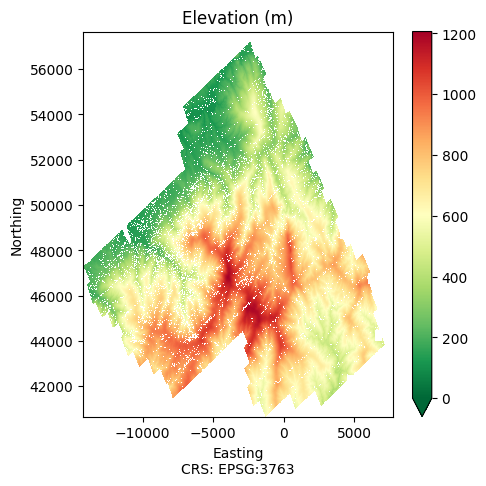

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rio

dtm_path = r"C:\Users\fuji_\Desktop\portfolio_geospatial\lidar_processing\SL_lidar_merged.copc_filtered_label_2.copc_1m.tiff"

dtm = rio.open_rasterio(dtm_path)

dtm_mask = dtm.where(dtm != dtm.rio.nodata)


plt.figure(figsize=(5, 5))

# Set minimum custom value as 0 as it is above sea level

dtm_mask.plot(cmap='RdYlGn_r', vmin=0)
plt.title('Elevation (m)')
plt.xlabel(f'Easting\nCRS: {dtm.rio.crs}')
plt.ylabel('Northing')
plt.show()